# 1. Imports and initial game variables

### 1.1 Default player names

In [1]:
import tkinter as tk  # Import tkinter library for GUI

In [2]:
player1_name = 'Donald stramp'  # Name for Player 1
player2_name = 'Donkey'  # Name for Player 2

### 1.2 Game control variables

In [3]:
is_play = True  # True allows the player moves; False stops further play. Example: player 1 cannot make 2 moves
current_symbol = 'o'  # 'o' starts the game
current_player = player1_name  # Whose turn it is now. Let's always start with play1
moves = []   # Stack to record moves for undo (row, col, symbol). This is for futher use that can allow to redo

# Define game logic functions
<br>A 1200×960 window
1. player1 / player2 functions (called methods in a class) to set names (defaults provided)

2. An is_play flag to prevent extra moves

3. A check_win function to detect three‑in‑a‑row (rows, columns, diagonals) and declare a winner or draw. 

4. Move recording in a stack and a “Redo” button to undo the last move

5. Layout: left side for Player 1, right side for Player 2, 3×3 grid centered, and “Redo” at top


In [4]:
def switch_player():
    """Switch the current symbol and player after each turn."""
    global current_symbol, current_player # Global is not convenient and not common in python! We will use self.xxx in a class
    if current_symbol == 'o':  # If 'o' just played
        current_symbol = 'x'    # Next is 'x'
        current_player = player2_name
    else:
        current_symbol = 'o'    # Otherwise back to 'o'
        current_player = player1_name

In [5]:
def check_win():
    """Check for a winning line or draw, update is_play and show message."""
    # In the future, we will use np.array_equal(a, b) 
    global is_play 
    # Read current board symbols from buttons
    # buttons[r][c]['text'] gets the symbol at that cell
    board = [[buttons[r][c]['text'] for c in range(3)] for r in range(3)] # This is called comprehensive it is equvilent to:
    # Equivalent using standard loops:
    # board = []
    # for r in range(3):
    #     row = []
    #     for c in range(3):
    #         row.append(buttons[r][c]['text'])
    #     board.append(row)    
    # All possible winning triplets
    lines = [
        [(0,0),(0,1),(0,2)], [(1,0),(1,1),(1,2)], [(2,0),(2,1),(2,2)],  # rows
        [(0,0),(1,0),(2,0)], [(0,1),(1,1),(2,1)], [(0,2),(1,2),(2,2)],  # columns
        [(0,0),(1,1),(2,2)], [(0,2),(1,1),(2,0)]                         # diagonals
    ]
    for line in lines:
        symbols = [board[r][c] for r, c in line]
        if symbols[0] and symbols.count(symbols[0]) == 3:
            is_play = False  # Stop further moves
            message_label.config(text=f"{current_player} wins!")  # Display winner
            return
    # Check for draw if board is full
    if all(board[r][c] for r in range(3) for c in range(3)):
        is_play = False
        message_label.config(text="It's a draw!")

In [7]:
def on_click(r, c):
    """Handle click on button at row r, column c."""
    if not is_play:  # If game over, ignore clicks
        return
    btn = buttons[r][c]
    if not btn['text']:  # Only if empty
        btn.config(text=current_symbol)  # Place 'o' or 'x'
        moves.append((r, c, current_symbol))  # Record move for undo
        check_win()        # Check if this move ended the game
        switch_player()    # Switch to next player

In [8]:
def redo():
    """Undo the last move, clear its symbol and allow play to continue."""
    global is_play
    if not moves:  # Nothing to undo
        return
    r, c, sym = moves.pop()  # Remove last move record
    buttons[r][c].config(text='')  # Clear that cell
    is_play = True  # Allow play (in case it was game over)
    message_label.config(text='')  # Clear any status message
    switch_player()  # Revert turn

# Create the 3×3 board buttons

In [33]:
# Frame to hold the 3×3 grid in the center
grid_frame = tk.Frame(root)
grid_frame.pack(expand=True)       # Expand to center

# Initialize a 3x3 list to hold button references
buttons = [[None for _ in range(3)] for _ in range(3)]
# Logic: Iterate over each row (i) and column (j) to create buttons.
# The nested loops cover all 9 positions, and .grid(row=i, column=j)
# places each button at the corresponding grid cell in grid_frame.
for i in range(3):  # Row index (0 to 2)
    for j in range(3):  # Column index (0 to 2)
        btn = tk.Button(
            grid_frame,           # Parent container for this button
            text='',              # Start with no symbol shown
            font=('Arial', 48),    # Large font for 'o'/'x'
            width=4,               # Width of button in text units
            height=2,              # Height of button in text units
            command=lambda r=i, c=j: on_click(r, c)  # Click handler passes row, col
        )
        btn.grid(row=i, column=j)  # Place button at grid row i, column j
        buttons[i][j] = btn        # Store the button reference

In [27]:
add = lambda a, b: a + b
# Now call it:
result = add(3, 5)
print(result)   # → 8

8


# Build the GUI components

In [28]:
root = tk.Tk()                     # Create the main window
root.geometry('1280x960')          # Set window size to 1200×960 pixels
root.title('Tic Tac Toe')          # Set window title

''

In [29]:
# Status message label at top of window
# tk.Label(...) creates a Label widget, which displays text or images in the window.
# Parameters:
#  - parent: the container (root window) to place the label into
#  - text: the content string to show
#  - font: tuple specifying (font family, size)
# After creation, call .pack() or another geometry method to place it.
# message_label: parent=root (main window), text='' (empty initially), font=('Arial',24)
message_label = tk.Label(
    root,    # Parent widget where this label appears
    text="lewis",         # Initial text content (empty)
    font=('Arial', 30) # Font tuple: (font family, size)
)

In [30]:
message_label.pack(pady=10)  # Use pack geometry manager to place the label, adding 10 pixels of vertical padding above and below it

In [31]:
# Frame to hold the 3×3 grid in the center
grid_frame = tk.Frame(root)
grid_frame.pack(expand=True)       # Expand to center

In [32]:
# Player 1 info on left side
left_frame = tk.Frame(root)
left_frame.place(relx=0.05, rely=0.5, anchor='w')  # 5% from left, centered vertically
player1_label = tk.Label(
    left_frame,
    text=f"{player1_name} (O)",
    font=('Arial', 30)
)
player1_label.pack()               # Pack into left frame

In [34]:
# Player 2 info on right side
right_frame = tk.Frame(root)
right_frame.place(relx=0.95, rely=0.5, anchor='e') # 95% from left
player2_label = tk.Label(
    right_frame,
    text=f"{player2_name} (X)",
    font=('Arial', 18)
)
player2_label.pack()              # Pack into right frame

# Redo button and start the game loop

In [36]:
redo_button = tk.Button(
    root,
    text='Redo',          # Button label
    font=('Arial', 16),   # Font size
    command=redo          # Undo handler
)
redo_button.pack(pady=5)  # Place with vertical padding

root.mainloop()  # Start Tkinter's event loop

TclError: can't invoke "button" command: application has been destroyed

In [40]:
root.mainloop()  # Start Tkinter's event loop

# Wrapped into a class

In [3]:
import tkinter as tk  # Import the tkinter library for GUI

class TicTacToe:
    def __init__(self, player1_name='player 1', player2_name='player 2'):
        # Initialize player names with defaults
        self.player1_name = player1_name  # Name for Player 1
        self.player2_name = player2_name  # Name for Player 2

        # Create the main application window
        self.root = tk.Tk()  # Initialize the Tkinter root window
        self.root.geometry('1280x960')  # Set window size to 1280×960 pixels
        self.root.title('Tic Tac Toe')  # Set the window title

        # Control flag to prevent extra moves after game ends
        self.is_play = True  # When False, disable further moves

        # Track whose turn it is: symbol and player name
        self.current_symbol = 'o'  # 'o' starts first
        self.current_player = self.player1_name  # Current player's name

        # Stack to record moves for redo functionality
        self.moves = []  # List of (row, col, symbol)

        # Label to display status messages (e.g., win or draw)
        self.message_label = tk.Label(self.root, text="", font=('Arial', 24))  # Status label
        self.message_label.pack(pady=10)  # Place label at top with vertical padding

        # Frame to hold the 3×3 grid in the center
        self.grid_frame = tk.Frame(self.root)  # Frame for grid buttons
        self.grid_frame.pack(expand=True)  # Center the frame in window

        # Frame and label for Player 1 on the left side
        self.left_frame = tk.Frame(self.root)  # Frame for Player 1 info
        self.left_frame.place(relx=0.05, rely=0.5, anchor='w')  # Position on left
        self.player1_label = tk.Label(
            self.left_frame,
            text=f"{self.player1_name} (o)",
            font=('Arial', 18)
        )  # Label for Player 1 and symbol
        self.player1_label.pack()  # Pack Player 1 label into left frame

        # Frame and label for Player 2 on the right side
        self.right_frame = tk.Frame(self.root)  # Frame for Player 2 info
        self.right_frame.place(relx=0.95, rely=0.5, anchor='e')  # Position on right
        self.player2_label = tk.Label(
            self.right_frame,
            text=f"{self.player2_name} (x)",
            font=('Arial', 18)
        )  # Label for Player 2 and symbol
        self.player2_label.pack()  # Pack Player 2 label into right frame

        # Create and store the 3×3 grid of buttons
        self.buttons = [[None for _ in range(3)] for _ in range(3)]  # Initialize button storage
        for i in range(3):  # For each row
            for j in range(3):  # For each column
                btn = tk.Button(
                    self.grid_frame,
                    text='',  # Start empty
                    font=('Arial', 48),  # Large font for 'o'/'x'
                    width=4,  # Button width
                    height=2,  # Button height
                    command=lambda r=i, c=j: self.on_click(r, c)  # Bind click handler
                )
                btn.grid(row=i, column=j)  # Place button in the grid
                self.buttons[i][j] = btn  # Save reference

        # Redo (undo) button at the top
        self.redo_button = tk.Button(
            self.root,
            text='Redo',  # Button label
            font=('Arial', 16),  # Font size
            command=self.redo  # Bind redo handler
        )
        self.redo_button.pack(pady=5)  # Place redo button above grid

    def set_player1(self, name):
        # Change Player 1's name dynamically
        self.player1_name = name  # Update name
        self.player1_label.config(text=f"{name} (o)")  # Update label text

    def set_player2(self, name):
        # Change Player 2's name dynamically
        self.player2_name = name  # Update name
        self.player2_label.config(text=f"{name} (x)")  # Update label text

    def switch_player(self):
        # Switch current symbol and current player after each move
        if self.current_symbol == 'o':  # If it was Player 1's turn
            self.current_symbol = 'x'  # Next is 'x'
            self.current_player = self.player2_name  # Next player name
        else:
            self.current_symbol = 'o'  # Otherwise go back to 'o'
            self.current_player = self.player1_name  # Back to Player 1

    def check_win(self):
        # Check all winning lines for a match or a full board draw
        board = [[self.buttons[r][c]['text'] for c in range(3)] for r in range(3)]  # Read grid text
        lines = [  # All possible winning triplets
            [(0,0),(0,1),(0,2)],  # Top row
            [(1,0),(1,1),(1,2)],  # Middle row
            [(2,0),(2,1),(2,2)],  # Bottom row
            [(0,0),(1,0),(2,0)],  # Left column
            [(0,1),(1,1),(2,1)],  # Middle column
            [(0,2),(1,2),(2,2)],  # Right column
            [(0,0),(1,1),(2,2)],  # Diagonal TL→BR
            [(0,2),(1,1),(2,0)]   # Diagonal TR→BL
        ]
        for line in lines:  # For each line
            symbols = [board[r][c] for r, c in line]  # Extract symbols
            if symbols[0] != '' and symbols.count(symbols[0]) == 3:
                self.is_play = False  # Stop game
                self.message_label.config(text=f"{self.current_player} wins!")  # Show winner
                return
        # Check for draw if board is full
        if all(board[r][c] != '' for r in range(3) for c in range(3)):
            self.is_play = False  # Stop game
            self.message_label.config(text="It's a draw!")  # Show draw message

    def on_click(self, r, c):
        # Handle a click on the button at (r, c)
        if not self.is_play:  # If game already ended, ignore
            return
        btn = self.buttons[r][c]  # Get button object
        if btn['text'] == '':  # Only if empty
            btn.config(text=self.current_symbol)  # Place current symbol
            self.moves.append((r, c, self.current_symbol))  # Record move
            self.check_win()  # Check win or draw
            self.switch_player()  # Change turn

    def redo(self):
        # Undo the last move if available
        if not self.moves:  # If no moves recorded
            return
        r, c, sym = self.moves.pop()  # Remove last move record
        self.buttons[r][c].config(text='')  # Clear that cell
        self.is_play = True  # Allow playing again
        self.message_label.config(text='')  # Clear any status message
        self.switch_player()  # Revert to the player who just played

    def run(self):
        # Start the Tkinter event loop to display the window
        self.root.mainloop()  # Keep the window open

if __name__ == '__main__':
    # Create an instance of the game and start it
    game = TicTacToe()  # Instantiate with default names
    game.run()  # Run the game loop

# Play with AI (Minimax)
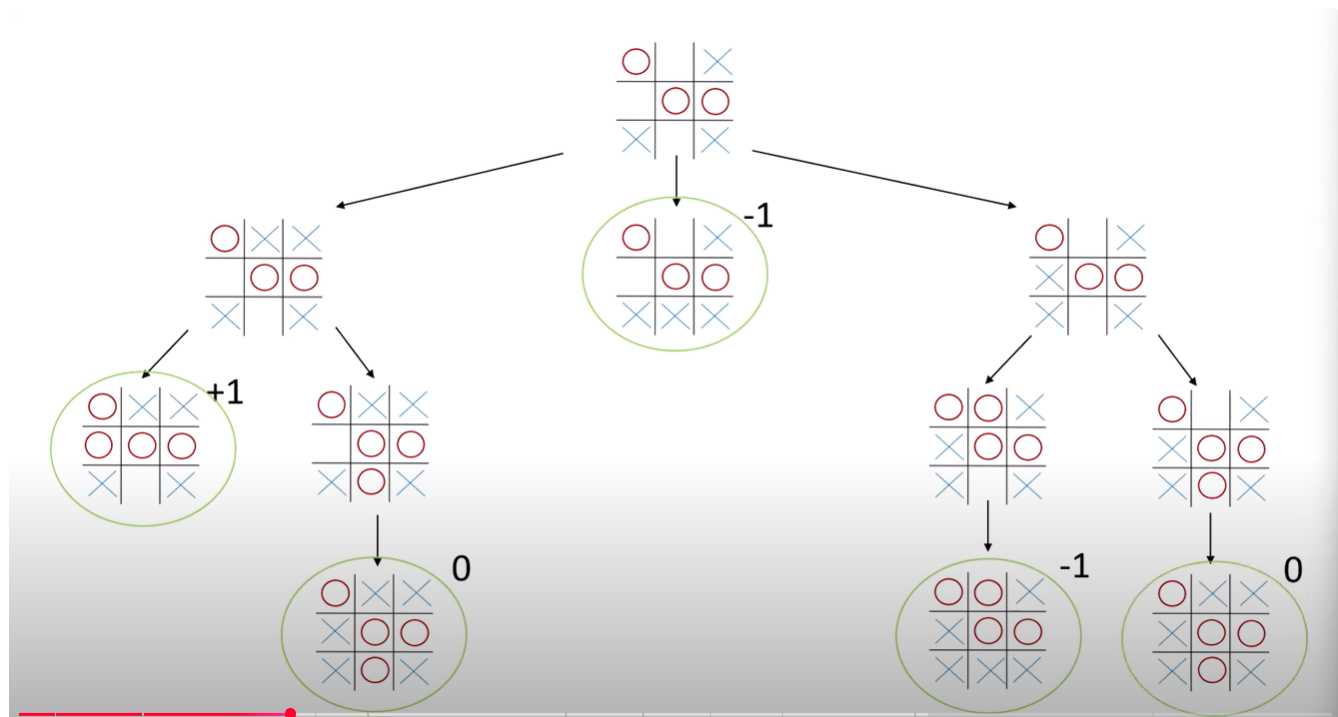

In [13]:
import tkinter as tk  # Import the tkinter library for GUI

class TicTacToe:
    def __init__(self, player1_name='Player 1', player2_name='Player 2', ai=False):
        # Initialize player names and AI option
        self.player1_name = player1_name
        self.player2_name = player2_name
        self.ai_enabled = ai  # When True, player2 is controlled by AI

        # Create the main application window
        self.root = tk.Tk()
        self.root.geometry('1280x960')
        self.root.title('Tic Tac Toe')

        # Control flag to prevent extra moves after game ends
        self.is_play = True

        # Track whose turn it is: symbol and player name
        self.current_symbol = 'o'  # 'o' starts first
        self.current_player = self.player1_name

        # Stack to record moves for redo functionality
        self.moves = []  # List of (row, col, symbol)

        # Label to display status messages (e.g., win or draw)
        self.message_label = tk.Label(self.root, text="", font=('Arial', 16))
        self.message_label.pack(pady=10)

        # Frame to hold the 3×3 grid
        self.grid_frame = tk.Frame(self.root)
        self.grid_frame.pack()

        # Create and store the 3×3 grid of buttons
        self.buttons = [[None for _ in range(3)] for _ in range(3)]
        for i in range(3):
            for j in range(3):
                btn = tk.Button(
                    self.grid_frame,
                    text='',
                    font=('Arial', 24),
                    width=4,
                    height=2,
                    command=lambda r=i, c=j: self.on_click(r, c)
                )
                btn.grid(row=i, column=j)
                self.buttons[i][j] = btn

        # Redo (undo) button
        self.redo_button = tk.Button(
            self.root,
            text='Undo',
            font=('Arial', 12),
            command=self.redo
        )
        self.redo_button.pack(pady=5)

    def switch_player(self):
        # Switch current symbol and current player after each move
        if self.current_symbol == 'o':
            self.current_symbol = 'x'
            self.current_player = self.player2_name
        else:
            self.current_symbol = 'o'
            self.current_player = self.player1_name

    def check_win(self):
        # Check all winning lines for a match or a full board draw
        board = [[self.buttons[r][c]['text'] for c in range(3)] for r in range(3)]
        lines = [
            [(0,0),(0,1),(0,2)], [(1,0),(1,1),(1,2)], [(2,0),(2,1),(2,2)],
            [(0,0),(1,0),(2,0)], [(0,1),(1,1),(2,1)], [(0,2),(1,2),(2,2)],
            [(0,0),(1,1),(2,2)], [(0,2),(1,1),(2,0)]
        ]
        for line in lines:
            symbols = [board[r][c] for r, c in line]
            if symbols[0] != '' and symbols.count(symbols[0]) == 3:
                self.is_play = False
                winner = self.current_player
                self.message_label.config(text=f"{winner} wins!")
                return
        # Check draw
        if all(board[r][c] != '' for r in range(3) for c in range(3)):
            self.is_play = False
            self.message_label.config(text="It's a draw!")

    def on_click(self, r, c):
        # Handle click on (r, c)
        if not self.is_play or self.buttons[r][c]['text'] != '':
            return
        # Human move
        self.buttons[r][c].config(text=self.current_symbol)
        self.moves.append((r, c, self.current_symbol))
        self.check_win()
        self.switch_player()

        # If AI enabled and it's AI's turn, let AI move
        if self.ai_enabled and self.current_symbol == 'x' and self.is_play:
            self.root.after(200, self.ai_move)

    def ai_move(self):
        # Determine best move with minimax
        best_score = float('-inf')
        move = None
        board = self.get_board_text()
        for r in range(3):
            for c in range(3):
                if board[r][c] == '':
                    board[r][c] = 'x'
                    score = self.minimax(board, 0, False)
                    board[r][c] = ''
                    if score > best_score:
                        best_score = score
                        move = (r, c)
        # Execute best move
        if move:
            r, c = move
            self.buttons[r][c].config(text='x')
            self.moves.append((r, c, 'x'))
            self.check_win()
            self.switch_player()

    def get_board_text(self):
        # Helper to return current board symbols
        return [[self.buttons[r][c]['text'] for c in range(3)] for r in range(3)]

    def minimax(self, board, depth, is_maximizing):
        # Terminal check
        winner = self.evaluate_board(board)
        if winner is not None:
            return winner
        if is_maximizing:
            best = float('-inf')
            symbol = 'x'
            for r in range(3):
                for c in range(3):
                    if board[r][c] == '':
                        board[r][c] = symbol
                        score = self.minimax(board, depth+1, False)
                        board[r][c] = ''
                        best = max(best, score)
            return best
        else:
            best = float('inf')
            symbol = 'o'
            for r in range(3):
                for c in range(3):
                    if board[r][c] == '':
                        board[r][c] = symbol
                        score = self.minimax(board, depth+1, True)
                        board[r][c] = ''
                        best = min(best, score)
            return best

    def evaluate_board(self, board):
        # Return +1 if AI wins, -1 if human wins, 0 for draw, None otherwise
        lines = [
            [(0,0),(0,1),(0,2)], [(1,0),(1,1),(1,2)], [(2,0),(2,1),(2,2)],
            [(0,0),(1,0),(2,0)], [(0,1),(1,1),(2,1)], [(0,2),(1,2),(2,2)],
            [(0,0),(1,1),(2,2)], [(0,2),(1,1),(2,0)]
        ]
        for line in lines:
            vals = [board[r][c] for r,c in line]
            if vals.count('x') == 3:
                return 1
            if vals.count('o') == 3:
                return -1
        # Check draw
        if all(board[r][c] != '' for r in range(3) for c in range(3)):
            return 0
        return None

    def redo(self):
        # Undo last move
        if not self.moves:
            return
        r, c, sym = self.moves.pop()
        self.buttons[r][c].config(text='')
        self.is_play = True
        self.message_label.config(text='')
        # After undo, set turn back to correct player
        self.current_symbol = sym
        self.current_player = self.player2_name if sym == 'x' else self.player1_name

    def run(self):
        # Start the Tkinter loop
        self.root.mainloop()

if __name__ == '__main__':
    # Pass ai=True to enable computer opponent
    game = TicTacToe(player2_name='Computer', ai=True)
    game.run()


4